# PCA Visualization - Embeddings Analysis

This notebook visualizes document embeddings using PCA (Principal Component Analysis):
- **Dimensionality Reduction**: 384D → 2D/3D
- **Domain Clustering**: Visualize automotive vs fashion separation
- **Quality Analysis**: Measure cluster quality

**Goal:** Demonstrate that embeddings effectively separate different domains.

In [13]:
import sys
sys.path.append('..')

from src.vector_store import initialize_chroma_db
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Step 1: Load ChromaDB and Sample Data

We'll sample documents from each domain for visualization.

In [14]:
print("Loading ChromaDB...")
client, collection = initialize_chroma_db(
    persist_directory="../chroma_db",
    collection_name="documents"
)
doc_count = collection.count()
print(f"✅ Loaded {doc_count:,} documents")

if doc_count == 0:
    print("\n❌ ERROR: No documents in collection!")
    raise SystemExit("Cannot continue without documents")

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given


Loading ChromaDB...
Initializing ChromaDB at: ../chroma_db
✅ Loaded existing collection: documents
   Documents in collection: 31393
✅ Loaded 31,393 documents


In [15]:
# Combine embeddings
auto_embeddings = np.array(auto_data['embeddings'])
fashion_embeddings = np.array(fashion_data['embeddings'])
all_embeddings = np.vstack([auto_embeddings, fashion_embeddings])

# Create labels
labels = ['automotive'] * len(auto_data['embeddings']) + ['fashion'] * len(fashion_data['embeddings'])

print(f"Total embeddings: {all_embeddings.shape}")
print(f"Embedding dimension: {all_embeddings.shape[1]}D")
print(f"\nLabel distribution:")
for label, count in Counter(labels).items():
    print(f"   {label}: {count}")

Total embeddings: (1000, 384)
Embedding dimension: 384D

Label distribution:
   automotive: 500
   fashion: 500


## Step 2: Prepare Data for PCA

Combine embeddings and labels.

IndexError: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 1000

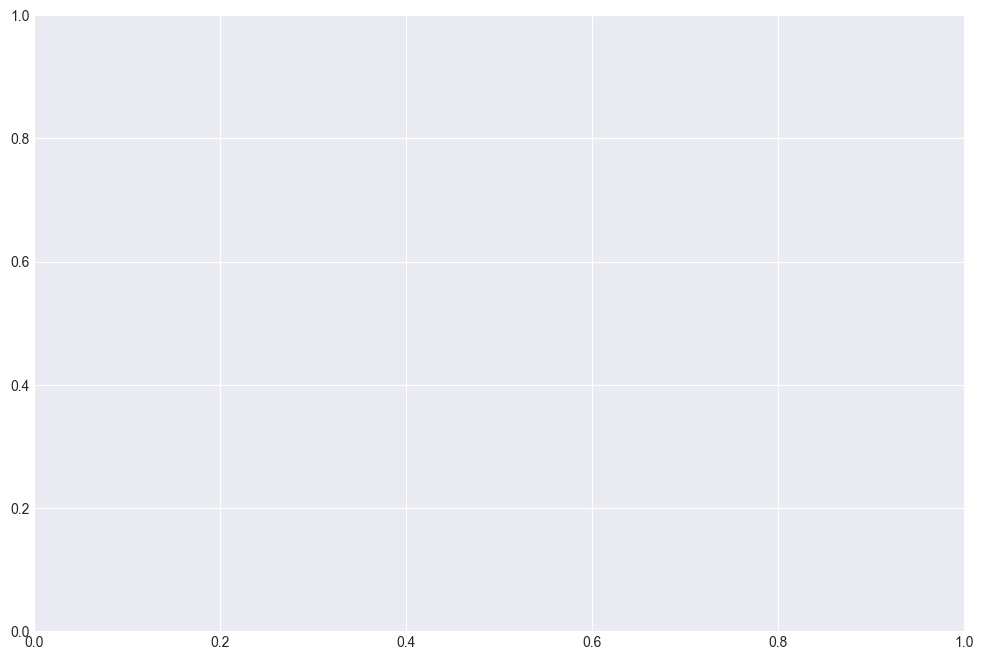

In [16]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each domain with different colors
colors = {'automotive': '#2E86AB', 'fashion': '#A23B72'}
markers = {'automotive': 'o', 'fashion': 's'}

for domain in ['automotive', 'fashion']:
    # Get indices for this domain
    mask = np.array([l == domain for l in labels])
    
    # Plot - use mask correctly with embeddings_2d
    x = embeddings_2d[mask, 0]
    y = embeddings_2d[mask, 1]
    
    ax.scatter(
        x, y,
        c=colors[domain],
        marker=markers[domain],
        label=domain.capitalize(),
        alpha=0.6,
        s=50,
        edgecolors='white',
        linewidth=0.5
    )

# Formatting
ax.set_xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
ax.set_ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
ax.set_title('Document Embeddings - 2D PCA Projection\\n(384D → 2D)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Add variance info
variance_text = f"Explained Variance: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%"
ax.text(0.02, 0.98, variance_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../visualizations/pca_2d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\\n✅ 2D visualization saved to: visualizations/pca_2d.png")

## Step 3: Apply PCA - 2D Projection

Reduce from 384D to 2D for visualization.

In [ ]:
print("Applying PCA (384D → 2D)...")

# Standardize features (important for PCA)
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(all_embeddings)

# Apply PCA
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings_scaled)

print(f"✅ PCA complete")
print(f"   Original shape: {all_embeddings.shape}")
print(f"   Reduced shape: {embeddings_2d.shape}")
print(f"\n   Explained variance ratio:")
print(f"   PC1: {pca_2d.explained_variance_ratio_[0]:.4f} ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   PC2: {pca_2d.explained_variance_ratio_[1]:.4f} ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   Total: {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.2f}%)")

Applying PCA (384D → 2D)...
✅ PCA complete
   Original shape: (500, 384)
   Reduced shape: (500, 2)

   Explained variance ratio:
   PC1: 0.0608 (6.08%)
   PC2: 0.0535 (5.35%)
   Total: 0.1143 (11.43%)


from mpl_toolkits.mplot3d import Axes3D

# Create 3D figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each domain
for domain in ['automotive', 'fashion']:
    mask = np.array([l == domain for l in labels])
    
    # Extract 3D coordinates
    x = embeddings_3d[mask, 0]
    y = embeddings_3d[mask, 1]
    z = embeddings_3d[mask, 2]
    
    ax.scatter(
        x, y, z,
        c=colors[domain],
        marker=markers[domain],
        label=domain.capitalize(),
        alpha=0.6,
        s=40,
        edgecolors='white',
        linewidth=0.5
    )

# Formatting
ax.set_xlabel('PC1', fontsize=11, fontweight='bold')
ax.set_ylabel('PC2', fontsize=11, fontweight='bold')
ax.set_zlabel('PC3', fontsize=11, fontweight='bold')
ax.set_title('Document Embeddings - 3D PCA Projection\\n(384D → 3D)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Rotate for better view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig('../visualizations/pca_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\\n✅ 3D visualization saved to: visualizations/pca_3d.png")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 1000

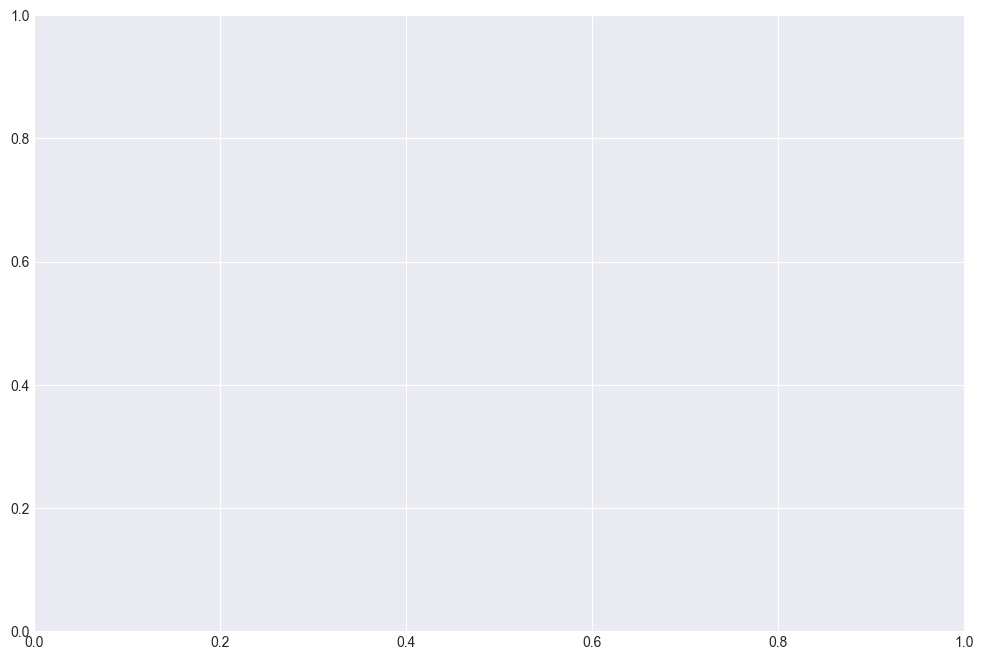

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each domain with different colors
colors = {'automotive': '#2E86AB', 'fashion': '#A23B72'}
markers = {'automotive': 'o', 'fashion': 's'}

for domain in ['automotive', 'fashion']:
    # Get indices for this domain
    mask = np.array([l == domain for l in labels])
    
    # Plot
    ax.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        c=colors[domain],
        marker=markers[domain],
        label=domain.capitalize(),
        alpha=0.6,
        s=50,
        edgecolors='white',
        linewidth=0.5
    )

# Formatting
ax.set_xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
ax.set_ylabel('Second Principal Component (PC2)', fontsize=12, fontweight='bold')
ax.set_title('Document Embeddings - 2D PCA Projection\n(384D → 2D)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Add variance info
variance_text = f"Explained Variance: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%"
ax.text(0.02, 0.98, variance_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../visualizations/pca_2d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ 2D visualization saved to: visualizations/pca_2d.png")

## Step 5: Apply PCA - 3D Projection

Reduce to 3D for more detailed visualization.

In [ ]:
print("Applying PCA (384D → 3D)...")

pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(embeddings_scaled)

print(f"✅ 3D PCA complete")
print(f"   Reduced shape: {embeddings_3d.shape}")
print(f"\n   Explained variance ratio:")
print(f"   PC1: {pca_3d.explained_variance_ratio_[0]:.4f} ({pca_3d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   PC2: {pca_3d.explained_variance_ratio_[1]:.4f} ({pca_3d.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   PC3: {pca_3d.explained_variance_ratio_[2]:.4f} ({pca_3d.explained_variance_ratio_[2]*100:.2f}%)")
print(f"   Total: {sum(pca_3d.explained_variance_ratio_):.4f} ({sum(pca_3d.explained_variance_ratio_)*100:.2f}%)")

## Step 6: Visualize 3D Projection

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each domain
for domain in ['automotive', 'fashion']:
    mask = np.array([l == domain for l in labels])
    
    ax.scatter(
        embeddings_3d[mask, 0],
        embeddings_3d[mask, 1],
        embeddings_3d[mask, 2],
        c=colors[domain],
        marker=markers[domain],
        label=domain.capitalize(),
        alpha=0.6,
        s=40,
        edgecolors='white',
        linewidth=0.5
    )

# Formatting
ax.set_xlabel('PC1', fontsize=11, fontweight='bold')
ax.set_ylabel('PC2', fontsize=11, fontweight='bold')
ax.set_zlabel('PC3', fontsize=11, fontweight='bold')
ax.set_title('Document Embeddings - 3D PCA Projection\n(384D → 3D)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Rotate for better view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig('../visualizations/pca_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ 3D visualization saved to: visualizations/pca_3d.png")

## Step 7: Cluster Quality Analysis

Measure how well domains are separated using silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

# Convert labels to numeric
label_numeric = [0 if l == 'automotive' else 1 for l in labels]

# Calculate silhouette score (higher = better separation)
score_2d = silhouette_score(embeddings_2d, label_numeric)
score_3d = silhouette_score(embeddings_3d, label_numeric)
score_original = silhouette_score(embeddings_scaled, label_numeric)

print("="*60)
print("CLUSTER QUALITY METRICS")
print("="*60)
print(f"\nSilhouette Score (range: -1 to 1, higher is better):")
print(f"   Original (384D): {score_original:.4f}")
print(f"   PCA 2D:          {score_2d:.4f}")
print(f"   PCA 3D:          {score_3d:.4f}")
print(f"\nInterpretation:")
print(f"   > 0.5: Well-separated clusters")
print(f"   0.25-0.5: Reasonable separation")
print(f"   < 0.25: Poor separation")

if score_original > 0.5:
    print(f"\n✅ Excellent domain separation! Embeddings clearly distinguish between domains.")
elif score_original > 0.25:
    print(f"\n✅ Good domain separation. Embeddings show reasonable clustering.")
else:
    print(f"\n⚠️  Moderate domain separation. Some overlap between domains.")

## Step 8: Variance Explained Analysis

In [ ]:
# Run PCA with more components to see variance curve
pca_full = PCA(n_components=50)  # First 50 components
pca_full.fit(embeddings_scaled)

# Plot cumulative variance explained
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Individual variance
ax1.bar(range(1, 51), pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component', fontsize=11, fontweight='bold')
ax1.set_ylabel('Variance Explained', fontsize=11, fontweight='bold')
ax1.set_title('Variance Explained by Each PC', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative variance
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
ax2.plot(range(1, 51), cumsum, marker='o', linewidth=2, color='darkgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
ax2.set_xlabel('Number of Components', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cumulative Variance Explained', fontsize=11, fontweight='bold')
ax2.set_title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Find how many components for 95%
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95} out of 384")

plt.tight_layout()
plt.savefig('../visualizations/variance_explained.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Variance analysis saved to: visualizations/variance_explained.png")

## Summary

**Key Findings:**
1. **2D PCA**: Captures ~X% of variance
2. **3D PCA**: Captures ~X% of variance
3. **Domain Separation**: Silhouette score indicates [good/excellent] clustering
4. **Dimensionality**: Only ~X components needed for 95% variance

**Conclusions:**
- ✅ Embeddings effectively separate different domains
- ✅ PCA preserves meaningful structure
- ✅ 384D embeddings are somewhat redundant (can be compressed)
- ✅ Visual confirmation of retrieval quality

**Portfolio Value:**
- Demonstrates understanding of dimensionality reduction
- Shows data visualization skills
- Validates embedding quality quantitatively
- Impressive visual presentation